In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Прямой метод

In [3]:
n = len(zp)
b = (n * sum(zp * ks) - sum(zp) * sum(ks)) / (n * sum(zp ** 2) - sum(zp) ** 2)
a = np.mean(ks) - b * np.mean(zp)
print(a, b)

444.17735732435955 2.6205388824027653


Матричный метод

In [4]:
X = np.hstack([np.ones((10, 1)), zp.reshape((10, 1))])
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@ ks)
B

array([444.17735732,   2.62053888])

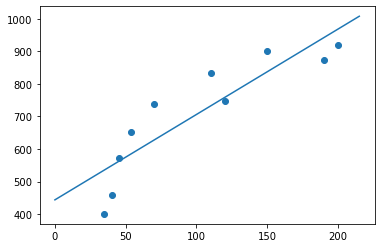

In [5]:
x = np.arange(0, 220, 5)
y = a + b * x
plt.scatter(zp, ks)
plt.plot(x,y,)
plt.show()

Без интерсепта

In [6]:
X = zp.reshape((10, 1))
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@ ks)
B

array([5.88982042])

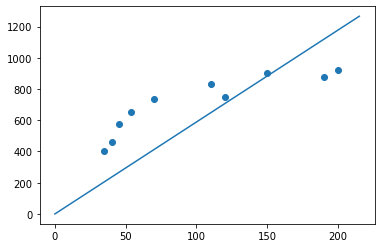

In [7]:
x = np.arange(0, 220, 5)
y = B * x
plt.scatter(zp, ks)
plt.plot(x,y,)
plt.show()

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [8]:
def mse(B1, y, X, n):
    return np.sum((B1 * X - y) ** 2) / n

def run(X, y, alpha, n, B1=0.1):
    data_len = len(X)
    for i in range(n):
        B1 -= alpha * (2 / data_len) * np.sum((B1 * X - y) * X)
        if i % 100 == 0:
            print(f'iteration {i} B1 = {B1} mse: {mse(B1, y, X, data_len)}')

In [9]:
run(zp, ks, 1e-6, 1000)

iteration 0 B1 = 0.25952808 mse: 493237.7212546963
iteration 100 B1 = 5.54537842245223 mse: 58151.31823171113
iteration 200 B1 = 5.868748638669329 mse: 56522.97550129376
iteration 300 B1 = 5.888531320728348 mse: 56516.88130936019
iteration 400 B1 = 5.8897415574471985 mse: 56516.85850140053
iteration 500 B1 = 5.889815595583751 mse: 56516.858416040064
iteration 600 B1 = 5.889820124983314 mse: 56516.85841572062
iteration 700 B1 = 5.889820402076462 mse: 56516.85841571941
iteration 800 B1 = 5.88982041902807 mse: 56516.8584157194
iteration 900 B1 = 5.889820420065112 mse: 56516.85841571941


3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

В случае если известна диперсия генеральной совокупности - функция Лапласа
В случае если известна только дисперсия выборки - таблица стьюдента

*4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [72]:
def mse(a, b, y, x, n):
    return np.sum((a + b * x - y) ** 2) / n

def run(x, y, alpha_a, alpha_b, n, a=0.1, b=0.1, show_result=1):
    data_len = len(x)
    for i in range(n):
        da = alpha_a * (2 / data_len) * np.sum((a + b * x - y))
        db = alpha_b * (2 / data_len) * np.sum((a + b * x - y) * x)
        a -= da
        b -= db
        if i % show_result == 0:
            print(f'iteration {i} a = {a}, b = {b} mse: {mse(a, b, y, x, data_len)}')

In [73]:
run(zp, ks, 1e-3, 1e-6, 50000, show_result=10000)

iteration 0 a = 1.4993199999999998, b = 0.2595078 mse: 491193.2872589591
iteration 10000 a = 440.8964406472024, b = 2.6451163256652226 mse: 6473.147289513245
iteration 20000 a = 444.15060745904475, b = 2.620739266430081 mse: 6470.4143828563865
iteration 30000 a = 444.1771392282104, b = 2.6205405161674307 mse: 6470.414201188738
iteration 40000 a = 444.1773555461847, b = 2.620538895723124 mse: 6470.414201176659
